# Projeto de análise de dados e predição - Petrobrás no mercado financeiro

Neste projeto de dados, faremos uma análise técnica acerca do comportamento das ações da Petrobrás em determinado intervalo de tempo.
Assim, num primerio momento, nos concentraremos na análise de dados exploratória dos preços das ações da Petrobrás ao longo do tempo (desde 01/01/2020 até 18/12/2023). Serão abordados temas como a evoução dos preços ao longo do tempo, taxa de retorno, etc.
Após, faremos previsões de preço com o uso de rede neurais recorrentes.
Linguagem: Python.
Principais bibliotecas utilizadas: Pandas, Numpy, Matplotlib, Seaborn e PyTorch.
Obs. Este projeto foi realizado a partir de uma adaptação de projetos dos cursos Python para Data Science e Machine Learning (Udemy), Python para Finanças: Análise de Dados e Machine Learning (IA Expert Academy) e Deep Learning de A a Z com PyTorch e Python (IA Expert Academy).


**Importando as bibliotecas necessárias para o início do projeto e obtendo os dados do Yahoo!Finance por meio da biblioteca Pandas Datareader.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas_datareader import data
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime


%matplotlib inline

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
yf.pdr_override()

In [4]:
df = web.get_data_yahoo('PETR4.SA', start="2020-01-01")


[*********************100%%**********************]  1 of 1 completed


**Análise inicial dos dados em forma de DataFrame.**

Em uma análise inicial dos dados pode-se verficar que o dataset possui sete colunas, sendo que a coluna data também é a coluna de índice.

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,30.510000,30.700001,30.309999,30.700001,11.298738,37774500
2020-01-03,30.879999,31.240000,30.450001,30.450001,11.206729,71595600
2020-01-06,30.430000,30.940001,29.950001,30.809999,11.339222,81844000
2020-01-07,30.820000,30.879999,30.469999,30.690001,11.295058,32822000
2020-01-08,30.690001,30.770000,30.240000,30.500000,11.225130,48215600
...,...,...,...,...,...,...
2023-12-14,35.000000,35.740002,34.840000,35.320000,35.320000,57950000
2023-12-15,35.279999,35.790001,35.000000,35.400002,35.400002,56570100
2023-12-18,35.750000,36.299999,35.580002,35.840000,35.840000,44474300


In [6]:
df = pd.DataFrame(df, columns=['Open',	'High',	'Low',	'Close',	'Adj Close',	'Volume'])

In [7]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,30.510000,30.700001,30.309999,30.700001,11.298738,37774500
2020-01-03,30.879999,31.240000,30.450001,30.450001,11.206729,71595600
2020-01-06,30.430000,30.940001,29.950001,30.809999,11.339222,81844000
2020-01-07,30.820000,30.879999,30.469999,30.690001,11.295058,32822000
2020-01-08,30.690001,30.770000,30.240000,30.500000,11.225130,48215600


As colunas referem-se aos preços das ações na abertura, alta, baixa, fechamento, fechamento ajustado e volume.

In [8]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-14,35.000000,35.740002,34.840000,35.320000,35.320000,57950000
2023-12-15,35.279999,35.790001,35.000000,35.400002,35.400002,56570100
2023-12-18,35.750000,36.299999,35.580002,35.840000,35.840000,44474300
2023-12-19,35.959999,36.250000,35.810001,36.250000,36.250000,32183000
2023-12-20,36.369999,36.709999,36.290001,36.549999,36.549999,21755900


In [9]:
df.shape

(988, 6)

In [10]:
#verificando o tipo dos dados de índice
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2020-01-02 to 2023-12-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       988 non-null    float64
 1   High       988 non-null    float64
 2   Low        988 non-null    float64
 3   Close      988 non-null    float64
 4   Adj Close  988 non-null    float64
 5   Volume     988 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 54.0 KB


A partir das informações acima verificamos que não há dados nulos e há 988 entradas que correspondem aos dias do período em questão. Todos os dados são numéricos, com exceção da coluna índice que refere-se a datas.

**Iniciando a análise exploratória dos dados.**

Algumas estatísticas dos dados.

In [12]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,988.000000,988.000000,988.000000,988.000000,988.000000,9.880000e+02
mean,27.338623,27.773866,26.897287,27.339474,15.628276,7.372732e+07
std,4.902331,4.921806,4.902913,4.923862,7.938953,3.754502e+07
min,11.070000,12.180000,10.850000,11.290000,4.155138,1.797710e+07
25%,23.895000,24.197501,23.392500,23.877500,9.658929,4.942102e+07
50%,27.705000,28.180000,27.265000,27.719999,13.204800,6.552090e+07
75%,30.712501,31.142499,30.250000,30.642499,20.063436,8.782712e+07
max,38.689999,38.860001,37.919998,38.520000,37.094730,4.902304e+08


Em uma rápida análise podemos verificar que o preço médio das ações tanto na abertura quanto no fechamento ao longo de todo o período é próximo de 27.33. Sendo o menor valor próximo a 11.07 e o maior 38.68 (na abertura).

Vamos verificar em qual dia houve o maior valor de fechamento.

In [13]:
df[df['Close'] > 38.5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-18,37.990002,38.610001,37.91,38.52,37.09473,85931700


Vamos analisar como estão distribuídos os valores de fechamento.

<ipython-input-14-400ee7bb7740>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Close'])


<Axes: xlabel='Close', ylabel='Density'>

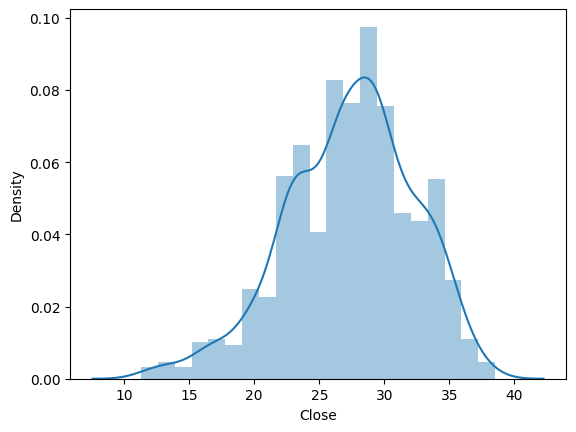

In [14]:
sns.distplot(df['Close'])

<Axes: xlabel='Close', ylabel='Count'>

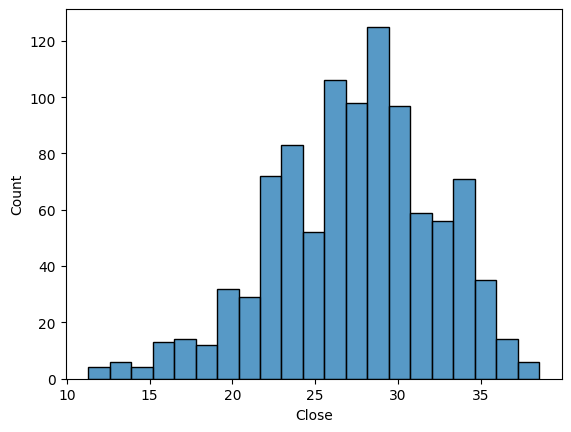

In [15]:
sns.histplot(df['Close'])

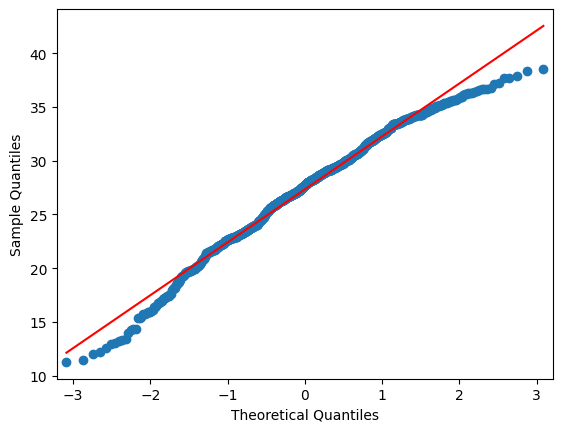

In [16]:
import statsmodels.api as sm
import pylab as py
sm.qqplot(df['Close'], line ='s')
py.show()


Aplicando o teste de normalidade Shapiro-Wilk


In [17]:
import scipy
scipy.stats.shapiro(df['Close'])

ShapiroResult(statistic=0.9862968921661377, pvalue=5.451270368439509e-08)

Por meio dos gráficos e do teste estatístico Shapiro-Wilk  é possível constatar que a maioria dos valores negociados encontram-se ao redor da média e  os dados encontram-se em um distribuição normal.

<Axes: >

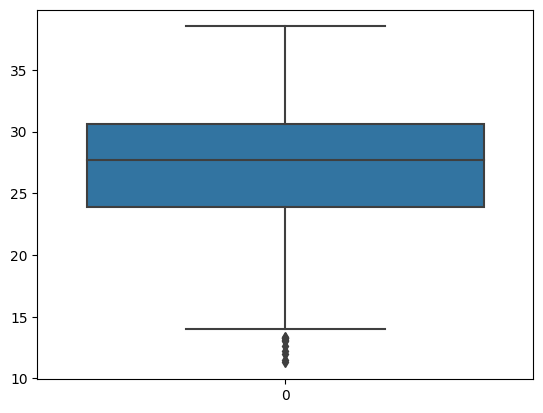

In [18]:
sns.boxplot(df['Close'])

Por meio do gráfico boxplot pode-se verificar que ocorrerm em alguns momentos negocições com valores muito abaixo e também acima da mediana (outliers), mas que em sua maioria os dados estão concentrados mesmo entre 25 e 30 (primeiro quartil e terceiro quartil).

Agora, vamos analisar o comportamento dos valores de abertura e fechamento ao longo do tempo

Text(0.5, 1.0, 'Petrobrás-abertura')

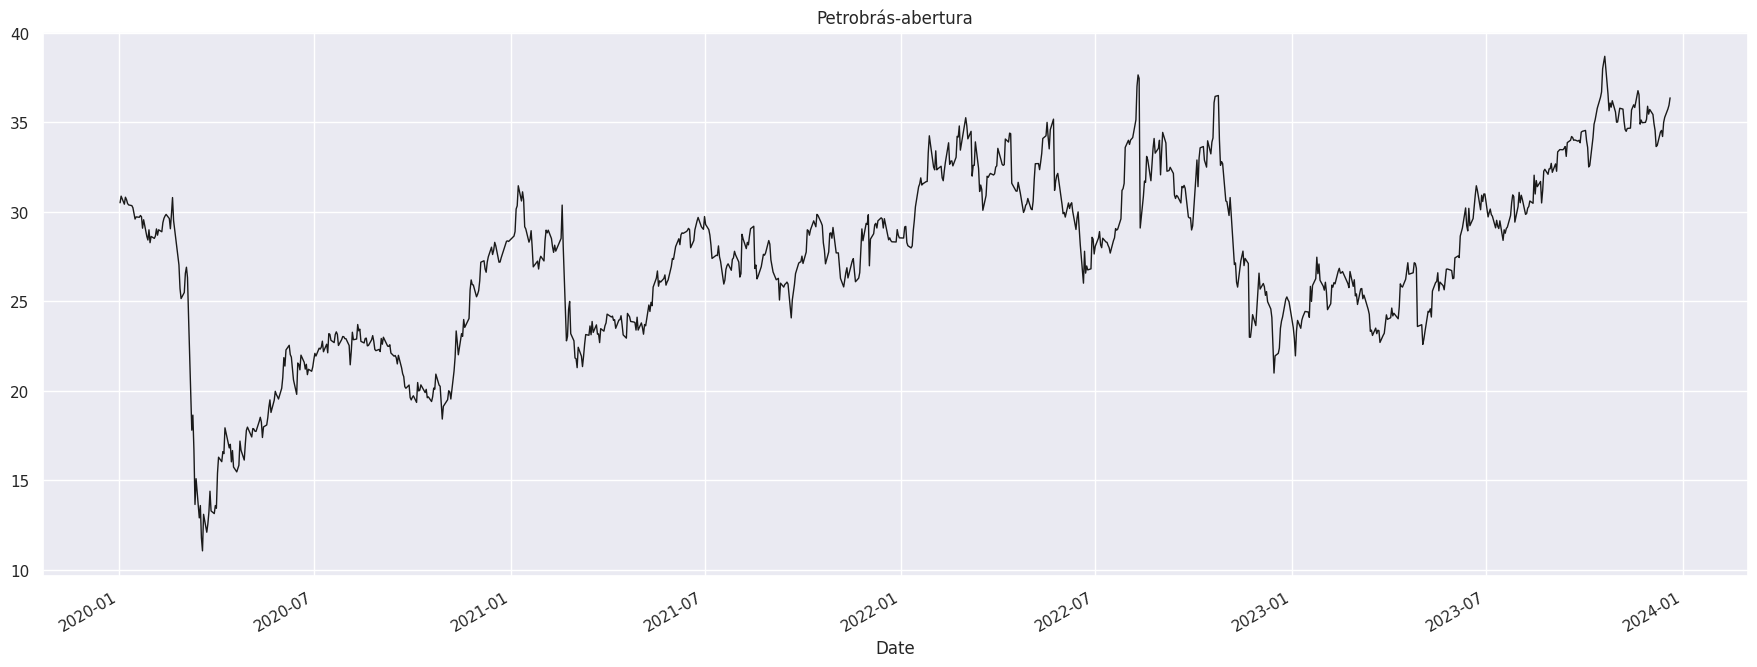

In [19]:
sns.set()
df['Open'].plot(color = 'k', lw = 1, figsize = (22, 8))
plt.title('Petrobrás-abertura')

Text(0.5, 1.0, 'Petrobrás-fechamento')

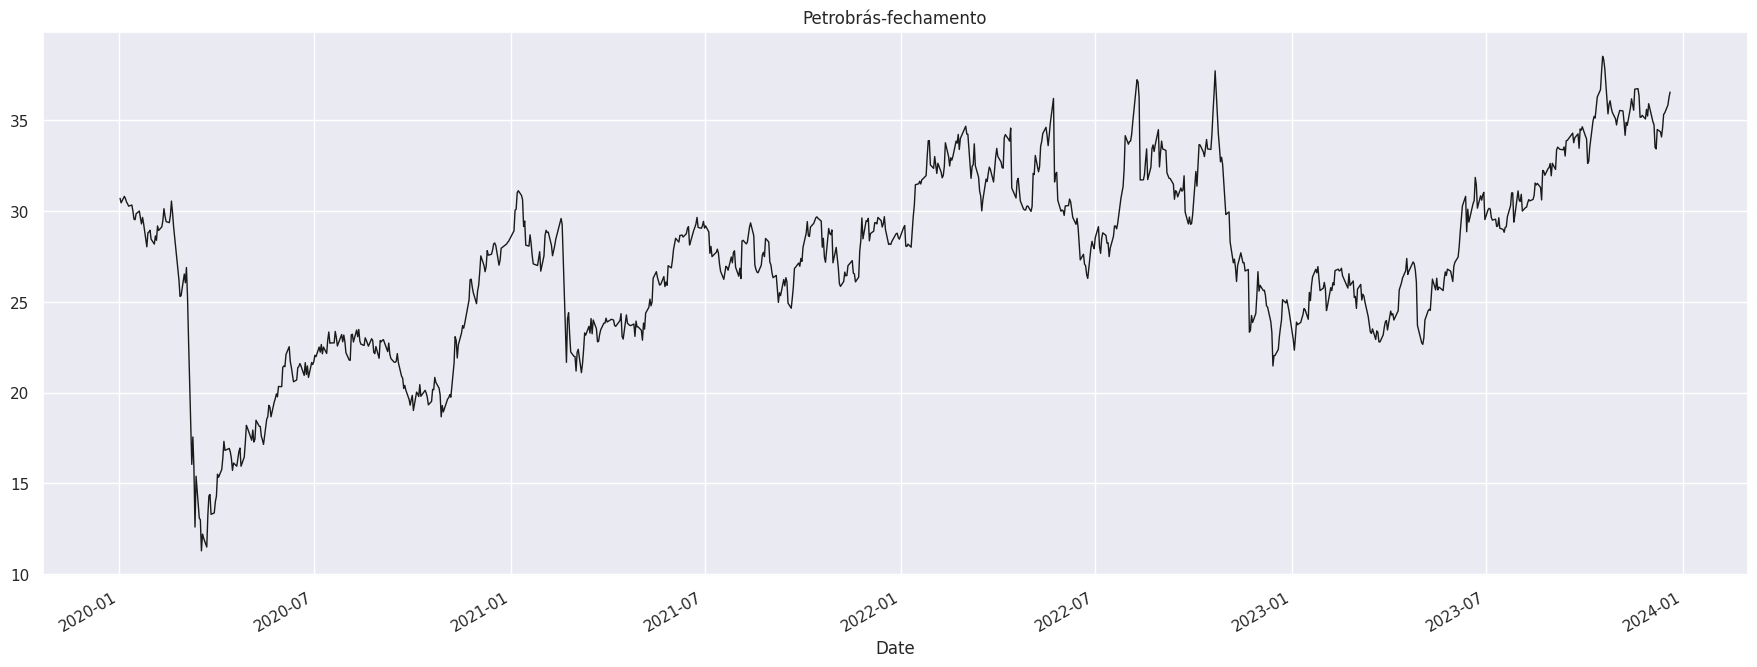

In [20]:
sns.set()
df['Close'].plot(color = 'k', lw = 1, figsize = (22, 8))
plt.title('Petrobrás-fechamento')

**Um gráfico que combina as informações: "Candlestick"**

O gráfico de velas é um estilo de gráfico financeiro que descreve a abertura, a máxima, a mínima e o fechamento de um determinado x coordenada (provavelmente tempo). As caixas representam a dispersão entre os valores open e close e as linhas representam a dispersão entre os valores low e < ai=7> valores. Os pontos de amostra onde o valor de fechamento é maior (menor) que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho. A combinação de determinadas caixas em sequência podem indicar tendências de alta ou queda e contribuir para algum tipo de tomada de decisão.

In [21]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

Fazendo uma análise da série temporal (dados de fechamento) quanto às suas características (estacionariedade, tendência, sazonalidade, residuais).

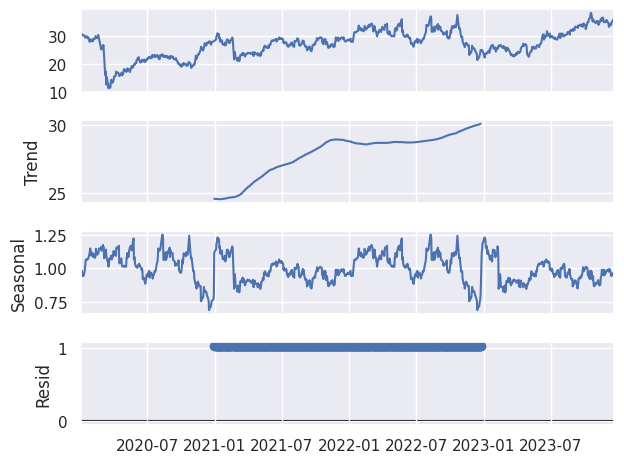

,Close
Date,
2020-01-02,30.700001
2020-01-03,30.450001
2020-01-06,30.809999
2020-01-07,30.690001
2020-01-08,30.500000
...,...
2023-12-14,35.320000
2023-12-15,35.400002
2023-12-18,35.840000


In [22]:
from pandas._libs.tslibs.parsing import parse_datetime_string
from pandas._libs.tslibs import strptime
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

data = pd.DataFrame(df['Close'])
period = int(len(data)/2)
result = seasonal_decompose(data, period=period, model='multiplicative')
result.plot()
plt.show()
data


In [23]:
from statsmodels.tsa.stattools import adfuller
test = adfuller(data)
test
print('Valor de P: %f' % test[1])


Valor de P: 0.195978


É possível constatar que a série temporal é uma série não estacionária, que possui uma leve tendência de alta no período entre 2020 e 2023, porém poderíamos intrepretar essa alta apenas como uma recuperação após uma queda acentuada, e que não há sazonalidade. Verifica-se, ainda, que as baixas ocorreram por volta de março de 2020, que foi o período em que ocorreu o início da pandemia do Covid19.

Obtendo, respectivamente, os maiores e os menores valores de abertura e fechamento ao longo do tempo

In [24]:
df['Open'].max(), df['Open'].min()

(38.689998626708984, 11.069999694824219)

In [25]:
df['Close'].max(), df['Close'].min()

(38.52000045776367, 11.289999961853027)

**Criando um DataFrame chamado returns. Este dataframe conterá os retornos para a ação da Petrobrás. Os retornos geralmente são definidos por:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Nesse caso estaremos primeiramente analisando o retorno de forma diária.



In [26]:
returns = pd.DataFrame(df['Close'].pct_change())

Análise dos dados do DataFrame dos retornos

In [27]:
returns.head()

,Close
Date,
2020-01-02,NaN
2020-01-03,-0.008143
2020-01-06,0.011823
2020-01-07,-0.003895
2020-01-08,-0.006191


Como a fórmula utiliza a informação do dia anterior, não teremos o dado relativo ao primeiro dia.

Verificando o retorno ao longo de todo o período de forma visual.

<Axes: xlabel='Date'>

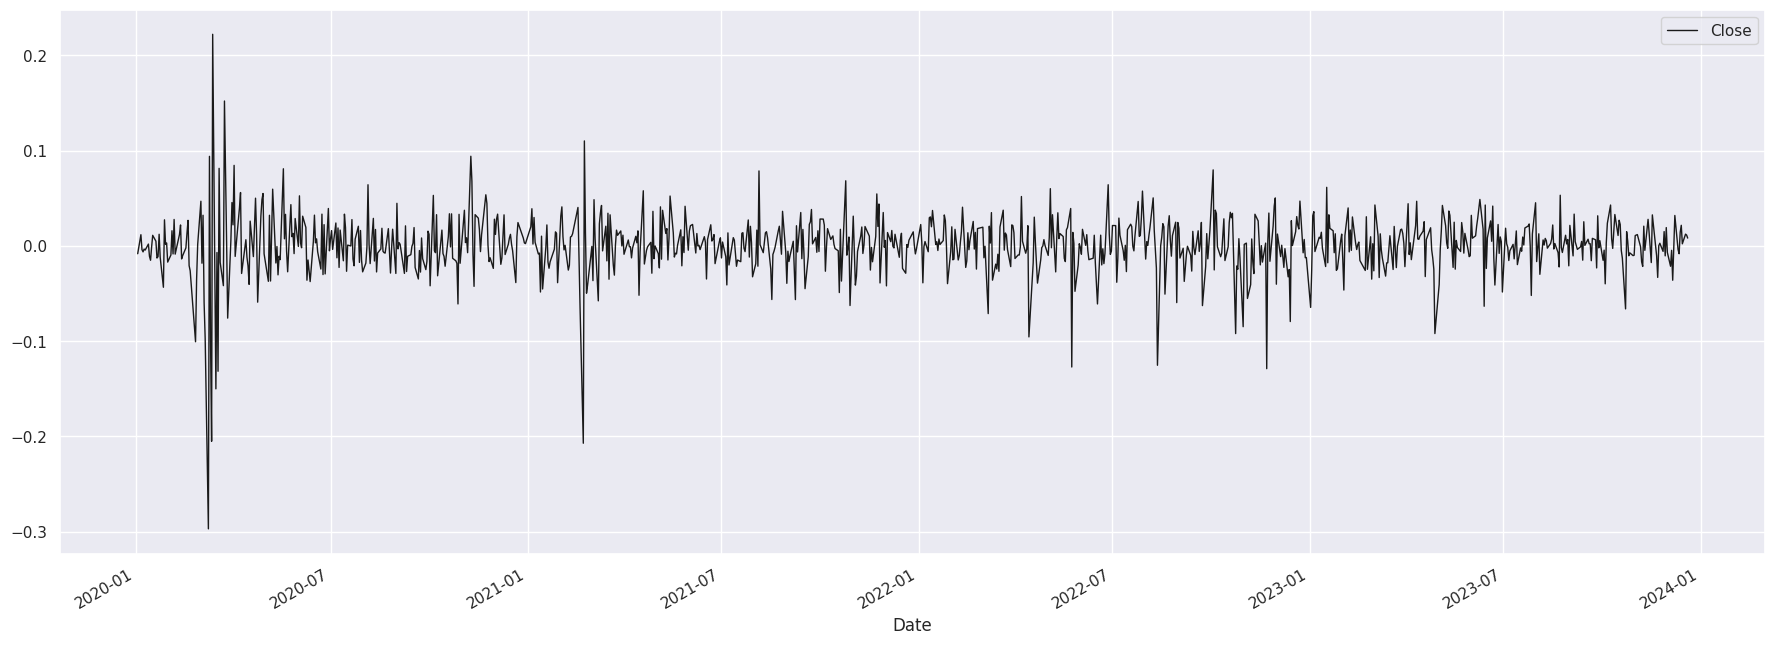

In [28]:
returns.plot(color = 'k', lw = 1, figsize = (22, 8))

Gráfico de distribuição do retorno

<ipython-input-29-86d3e5128e2f>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

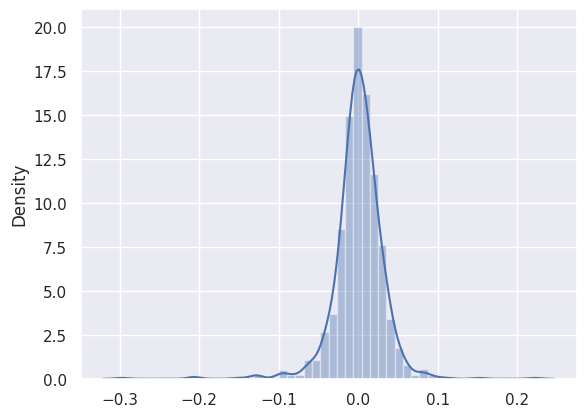

In [29]:
sns.distplot(returns)

Pelo gráfico pode-se verificar que os dados encontram-se muito próximos a média e possuem pouca variação.

Verificando os maiores e menores retornos e os dias em que ocorreram.

In [30]:
returns.min()

Close   -0.296978
dtype: float64

In [31]:
returns.idxmin()

Close   2020-03-09
dtype: datetime64[ns]

In [32]:
returns.max()

Close    0.222222
dtype: float64

In [33]:
returns.idxmax()

Close   2020-03-13
dtype: datetime64[ns]

Verificando o desvio padrão dos retornos do último ano.

In [34]:
returns['2022-12-19':'2023-12-18'].std()

Close    0.022113
dtype: float64

Verificando a média dos retornos do último ano.


In [35]:
returns['2022-12-19':'2023-12-18'].mean()

Close    0.00219
dtype: float64

**Podemos também analisar qual foi o retorno ao longo de todo o período**

In [36]:
returns_all = ((df['Close'][-1] - df['Close'][0]) / df['Close'][0])*100

In [37]:
returns_all

19.055369148990764

Ao longo de todo o período a taxa de retorno foi de 16,87%.

**Comparando ações**

Vamos comparar a evolução dos valores de fechamento da Petrobrás com o índice BOVA11.
O iShares Ibovespa Fundo de Índice (BOVA11) é um ETF que busca refletir a performance, antes das taxas e despesas, do Índice Bovespa. Foi criado em 2008 e consiste principalmente nas ações que compõem a carteira teórica do Índice. O gestor é a Black Rock Brasil, o administrador é o Banco BNP Paribas. É possível realizar investimento em lotes a partir de 50.000 cotas.

O Índice Bovespa (IBOV) é o principal indicador de desempenho das ações negociadas na B3. Ele reúne as empresas mais importantes do mercado de capitais brasileiro. É composto pelas ações e units (misto de ações ordinárias e preferenciais) de companhias listadas na B3 que atendem a determinados critérios. Os papéis que compõe o Ibovespa correspondem a cerca de 80% do número de negócios e do volume financeiro do mercado brasileiro de capitais.

O fundo investe no mínimo 95% de seu patrimônio em ações do IBOV, em qualquer proporção. Ele também pode investir em posições compradas no mercado futuro do Índice. Nos restantes 5% de sua carteira, o fundo pode deter ações e outros ativos não incluídos no IBOV.

In [38]:
acoes = ['BOVA11.SA', 'PETR4.SA']

In [39]:
new_df = pd.DataFrame()
for acao in acoes:
  new_df[acao] =df = web.get_data_yahoo(acao, start='2020-01-01')['Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [40]:
new_df.head()

,BOVA11.SA,PETR4.SA
Date,,
2020-01-02,114.239998,30.700001
2020-01-03,113.800003,30.450001
2020-01-06,112.589996,30.809999
2020-01-07,112.239998,30.690001
2020-01-08,111.949997,30.500000


In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2020-01-02 to 2023-12-20
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BOVA11.SA  988 non-null    float64
 1   PETR4.SA   988 non-null    float64
dtypes: float64(2)
memory usage: 23.2 KB


In [42]:
columns = new_df.columns

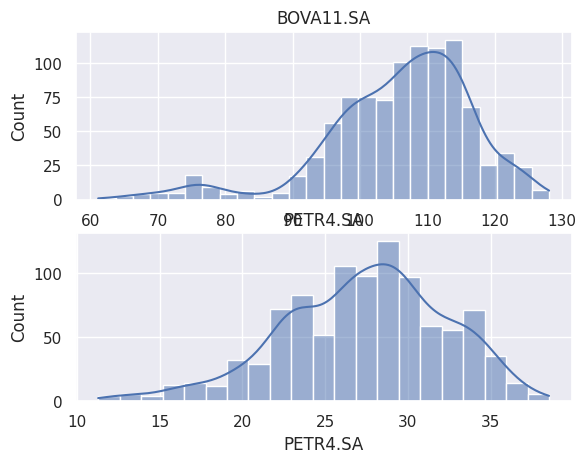

In [43]:
plt.figure()
i = 1
for i in np.arange(0, len(new_df.columns)):
  plt.subplot( 2, 1, i + 1)
  sns.histplot(new_df[new_df.columns[i]], kde = True)
  plt.title(new_df.columns[i])

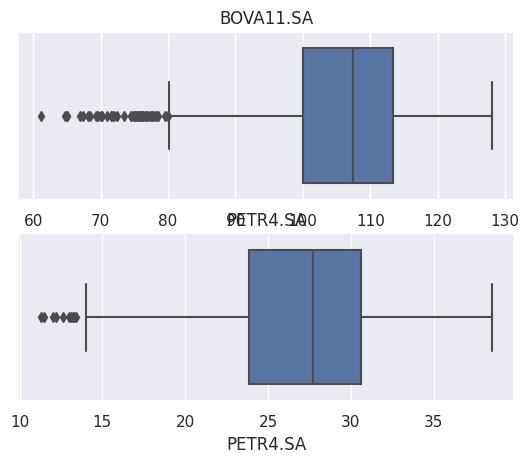

In [44]:
plt.figure()
i = 1
for i in np.arange(0, len(new_df.columns)):
  plt.subplot( 2, 1, i + 1)
  sns.boxplot(x = new_df[new_df.columns[i]])
  plt.title(new_df.columns[i])

<Axes: xlabel='Date'>

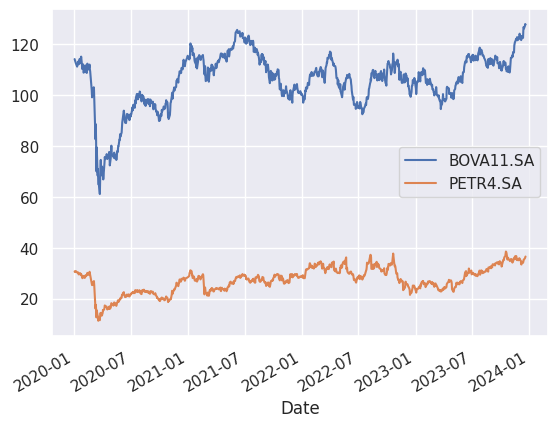

In [45]:
new_df.plot()

In [46]:
new_df_norm = new_df.copy()
for i in new_df_norm.columns[0:]:
  new_df_norm[i] = new_df_norm[i] / new_df_norm[i][0]

In [47]:
new_df_norm.head()

,BOVA11.SA,PETR4.SA
Date,,
2020-01-02,1.000000,1.000000
2020-01-03,0.996149,0.991857
2020-01-06,0.985557,1.003583
2020-01-07,0.982493,0.999674
2020-01-08,0.979954,0.993485


<Axes: xlabel='Date'>

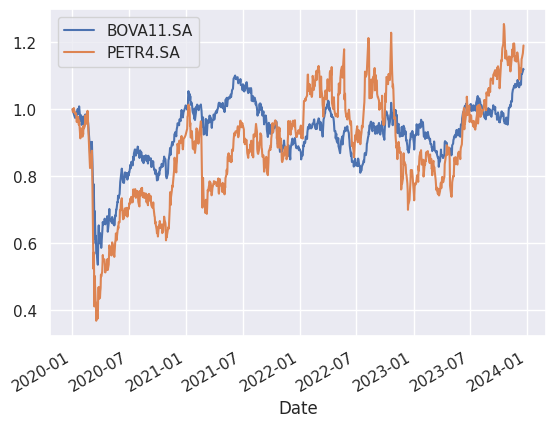

In [48]:
new_df_norm.plot()

Após a normalização dos dados, é possível analisar melhor as variações das ações analisadas.

**Previsão do preço de ações com redes neurais recorrentes**

Nesse momento, vamos fazer previsões dos valores de fechamento das ações da Petobrás, levando em consideração os 30 dias anteriores.

Bibliotecas utilizadas nessa seção do projeto

In [49]:
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn, optim
from sklearn.metrics import mean_absolute_error
torch.__version__

'2.1.0+cu121'

In [50]:
torch.manual_seed(12)

Divisão dos dados para treinamento e teste

In [51]:
data

,Close
Date,
2020-01-02,30.700001
2020-01-03,30.450001
2020-01-06,30.809999
2020-01-07,30.690001
2020-01-08,30.500000
...,...
2023-12-14,35.320000
2023-12-15,35.400002
2023-12-18,35.840000


In [52]:
df_train = data[:901]

In [53]:
df_train

,Close
Date,
2020-01-02,30.700001
2020-01-03,30.450001
2020-01-06,30.809999
2020-01-07,30.690001
2020-01-08,30.500000
...,...
2023-08-09,30.459999
2023-08-10,30.629999
2023-08-11,30.559999


In [54]:
df_train.shape

(901, 1)

In [55]:
df_test = data[901:]

Usaremos somente os últimos 87 dias para teste.

In [56]:
df_test.shape

(87, 1)

**Para previsão usaremos somente os dados de abertura**

In [57]:
base_treinamento = df_train.iloc[:].values

In [58]:
base_treinamento.shape

(901, 1)

In [59]:
type(base_treinamento)

numpy.ndarray

In [60]:
base_treinamento.shape

(901, 1)

Faremos a normalização dos dados antes do envio para a rede neural.

In [61]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [62]:
base_treinamento_normalizada

array([[0.73439273],
       [0.72493378],
       [0.73855462],
       [0.73401436],
       [0.72682554],
       [0.72304195],
       [0.71812333],
       [0.72039346],
       [0.70790765],
       [0.69088151],
       [0.68974649],
       [0.70223229],
       [0.70790765],
       [0.69353008],
       [0.68104427],
       [0.69466511],
       [0.68142257],
       [0.63337117],
       [0.66250467],
       [0.6643965 ],
       [0.66780173],
       [0.6492622 ],
       [0.63904652],
       [0.65607258],
       [0.646992  ],
       [0.67688231],
       [0.66742336],
       [0.67499048],
       [0.68823302],
       [0.71282627],
       [0.6973136 ],
       [0.68596289],
       [0.68369277],
       [0.6984487 ],
       [0.7287173 ],
       [0.70488079],
       [0.67536885],
       [0.56450997],
       [0.5300794 ],
       [0.53159287],
       [0.57661748],
       [0.55845625],
       [0.59023832],
       [0.52970111],
       [0.43662503],
       [0.18009834],
       [0.23723039],
       [0.172

Usaremos o intervalo dos 30 dias anteriores para prever o próximo dia

In [63]:
X = []
y = []
for i in range(30, 901):
  X.append(base_treinamento_normalizada[i-30:i, 0])
  y.append(base_treinamento_normalizada[i, 0])
X, y = np.array(X), np.array(y)

In [64]:
len(X[5])

30

Conversão dos dados para tensores

In [65]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

Organizando os dados para o uso da biblioteca PyTorch

In [66]:
dataset = torch.utils.data.TensorDataset(X, y)
loader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

**Construção da rede neural recorrente em forma de classe**

In [67]:
class regressor_LSTM(nn.Module):
  def __init__(self):
    super().__init__()

    self.lstm1 = nn.LSTM(input_size=1, hidden_size=100)
    self.lstm2 = nn.LSTM(100, 50)
    self.lstm3 = nn.LSTM(50, 50, dropout = 0.3, num_layers=2)
    self.dropout = nn.Dropout(p = 0.3)
    self.linear = nn.Linear(in_features=50, out_features=1)

  def forward(self, X):
    X = X.permute(1, 0).unsqueeze(2)
    X, _ = self.lstm1(X)
    X = self.dropout(X)
    X, _ = self.lstm2(X)
    X = self.dropout(X)
    X, _ = self.lstm3(X)

    X = X[-1]
    X = self.dropout(X)
    X = self.linear(X)

    return X

In [68]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [69]:
regressor = regressor_LSTM()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(regressor.parameters(), lr = 1e-3, alpha = 0.9)

In [70]:
regressor.to(device)

regressor_LSTM(
  (lstm1): LSTM(1, 100)
  (lstm2): LSTM(100, 50)
  (lstm3): LSTM(50, 50, num_layers=2, dropout=0.3)
  (dropout): Dropout(p=0.3, inplace=False)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

**Início do treinamento**

In [71]:
for epoch in range(100):
    running_loss = 0.
    running_mae = 0.

    for i, data in enumerate(loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = regressor(inputs)
        outputs = outputs.flatten()

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        mae = mean_absolute_error(labels.detach().cpu().numpy().flatten(),
                                  outputs.detach().cpu().numpy().flatten())
        running_mae += mae


        print('\rÉpoca {:3d} - Loop {:3d} de {:3d}: custo {:03.5f} - MAE {:03.5f}'.format(epoch+1, i+1, len(loader), loss, mae), end = '\r')


    running_loss /= len(loader)
    running_mae /= len(loader)
    print('ÉPOCA {:3d} FINALIZADA: custo {:03.6f} - MAE {:03.6f}     '.format(epoch+1, running_loss, running_mae))

ÉPOCA   1 FINALIZADA: custo 0.073246 - MAE 0.209251     
ÉPOCA   2 FINALIZADA: custo 0.035887 - MAE 0.147888     
ÉPOCA   3 FINALIZADA: custo 0.026308 - MAE 0.127110     
ÉPOCA   4 FINALIZADA: custo 0.023971 - MAE 0.119349     
ÉPOCA   5 FINALIZADA: custo 0.025182 - MAE 0.119681     
ÉPOCA   6 FINALIZADA: custo 0.018311 - MAE 0.103654     
ÉPOCA   7 FINALIZADA: custo 0.017293 - MAE 0.100050     
ÉPOCA   8 FINALIZADA: custo 0.013418 - MAE 0.090293     
ÉPOCA   9 FINALIZADA: custo 0.013651 - MAE 0.092092     
ÉPOCA  10 FINALIZADA: custo 0.013966 - MAE 0.093623     
ÉPOCA  11 FINALIZADA: custo 0.011052 - MAE 0.082058     
ÉPOCA  12 FINALIZADA: custo 0.011550 - MAE 0.082881     
ÉPOCA  13 FINALIZADA: custo 0.010949 - MAE 0.079199     
ÉPOCA  14 FINALIZADA: custo 0.010166 - MAE 0.078796     
ÉPOCA  15 FINALIZADA: custo 0.009813 - MAE 0.077226     
ÉPOCA  16 FINALIZADA: custo 0.009733 - MAE 0.077629     
ÉPOCA  17 FINALIZADA: custo 0.009150 - MAE 0.073729     
ÉPOCA  18 FINALIZADA: custo 0.0

**Início da fase de teste**

Preprocessamento da base de teste

In [72]:
valor_real_teste = df_test.iloc[:, 0:1].values

In [73]:
valor_real_teste


array([[31.54000092],
       [31.44000053],
       [31.52000046],
       [31.29999924],
       [30.61000061],
       [32.24000168],
       [32.18999863],
       [31.96999931],
       [32.33000183],
       [32.40000153],
       [32.61999893],
       [31.94000053],
       [32.63000107],
       [32.29000092],
       [33.36999893],
       [33.52000046],
       [33.40000153],
       [33.36999893],
       [33.52999878],
       [33.02999878],
       [33.86999893],
       [33.88999939],
       [34.13000107],
       [34.20999908],
       [34.29000092],
       [33.75999832],
       [34.02999878],
       [34.25      ],
       [33.45999908],
       [34.52000046],
       [34.45000076],
       [34.63999939],
       [34.11999893],
       [33.97000122],
       [32.61999893],
       [32.72999954],
       [33.50999832],
       [34.95000076],
       [35.20999908],
       [35.11999893],
       [36.27999878],
       [36.68000031],
       [37.66999817],
       [38.52000046],
       [38.34000015],
       [37

In [74]:
valor_real_teste.shape

(87, 1)

In [75]:
base_completa = pd.concat((df_train, df_test), axis = 0)

In [76]:
base_completa.shape

(988, 1)

In [77]:
entradas = base_completa[len(base_completa) - len(df_test) - 30:].values

In [78]:
entradas.shape

(117, 1)

In [79]:
entradas = entradas.reshape(-1,1)
entradas.shape

(117, 1)

In [80]:
entradas = normalizador.transform(entradas)
entradas

array([[0.71206961],
       [0.69466511],
       [0.68898975],
       [0.69088151],
       [0.67574721],
       [0.67650394],
       [0.69390837],
       [0.67196362],
       [0.66969349],
       [0.66363977],
       [0.67385545],
       [0.67499048],
       [0.69580021],
       [0.71925836],
       [0.74574344],
       [0.74574344],
       [0.68482779],
       [0.69882707],
       [0.7499054 ],
       [0.73060914],
       [0.72796064],
       [0.74271658],
       [0.70790765],
       [0.71509647],
       [0.7162315 ],
       [0.72531208],
       [0.73174416],
       [0.72909567],
       [0.73212253],
       [0.74044645],
       [0.7661748 ],
       [0.76239121],
       [0.76541807],
       [0.75709415],
       [0.7309875 ],
       [0.79265988],
       [0.79076798],
       [0.78244413],
       [0.79606511],
       [0.7987136 ],
       [0.80703738],
       [0.7813091 ],
       [0.80741582],
       [0.79455164],
       [0.83541422],
       [0.84108965],
       [0.8365494 ],
       [0.835

In [81]:
X_teste = []
for i in range(30 ,117):
  X_teste.append(entradas[i-30:i, 0])
X_teste = np.array(X_teste)

In [82]:
X_teste = torch.tensor(X_teste, device = device, dtype=torch.float32)

Início das previsões

In [83]:
regressor.eval()
previsoes = regressor.forward(X_teste)

In [84]:
len(previsoes)

87

In [85]:
previsoes

tensor([[0.7055],
        [0.7264],
        [0.7235],
        [0.7262],
        [0.7210],
        [0.6994],
        [0.7489],
        [0.7471],
        [0.7388],
        [0.7532],
        [0.7554],
        [0.7611],
        [0.7416],
        [0.7627],
        [0.7527],
        [0.7827],
        [0.7870],
        [0.7831],
        [0.7849],
        [0.7900],
        [0.7753],
        [0.7995],
        [0.7989],
        [0.8046],
        [0.8082],
        [0.8104],
        [0.7965],
        [0.8052],
        [0.8105],
        [0.7874],
        [0.8179],
        [0.8142],
        [0.8183],
        [0.8066],
        [0.8037],
        [0.7661],
        [0.7698],
        [0.7909],
        [0.8249],
        [0.8290],
        [0.8290],
        [0.8600],
        [0.8662],
        [0.8868],
        [0.9023],
        [0.8974],
        [0.8915],
        [0.8408],
        [0.8597],
        [0.8599],
        [0.8465],
        [0.8425],
        [0.8343],
        [0.8253],
        [0.8347],
        [0

Para podermos avaliar as previsões teremos que fazer o processamento das tranformações de forma inversa

In [86]:
previsoes = previsoes.detach().cpu().numpy().reshape(-1,1)
previsoes.shape

(87, 1)

In [87]:
previsoes = normalizador.inverse_transform(previsoes)

Comparando as médias

In [88]:
previsoes.mean()

32.742287

In [89]:
valor_real_teste.mean()

34.4963216891234

Com essa comparação há índicios de que a rede está obtendo em bom resultado nas previsões.

Vamos fazer uma análise visual dos resultados

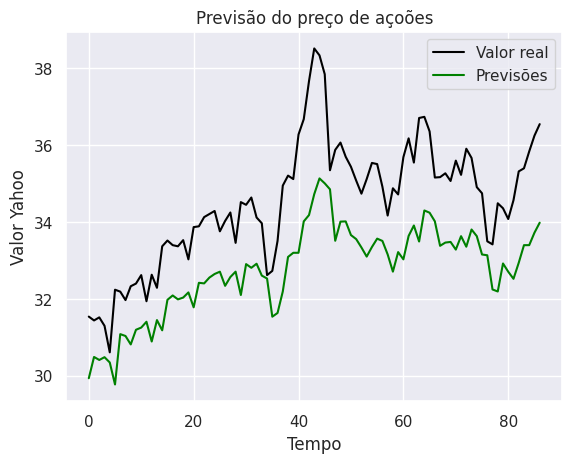

In [90]:
plt.plot(valor_real_teste, color='black', label='Valor real')
plt.plot(previsoes, color = 'green', label='Previsões')
plt.title('Previsão do preço de açoões')
plt.xlabel('Tempo')
plt.ylabel('Valor Yahoo')
plt.legend()

**Conclusão**

Foi possível verificar, em um primeiro momento,m que a rede neural consegue acompanhar com um bom nível de assertividade a tendência da série temporal.